In [ ]:
import numpy as np
import scipy.stats as st
import pandas as pd
from matplotlib import pyplot as plt

# **Reading the excel file**

In [ ]:
df = pd.read_excel(r'Week 9 activity.xlsx')
df

,Sr No,Total bill,Tip,Gender,Day,Time,Size
0,1,13.96589,1.01,Female,Sun,Dinner,2
1,2,17.34565,1.66,Male,Sun,Dinner,3
2,3,14.25061,3.50,Male,Sun,Dinner,3
3,4,15.05258,3.31,Male,Sun,Dinner,2
4,5,15.60354,3.61,Female,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,240,14.79501,5.92,Male,Sat,Dinner,3
240,241,13.82787,2.00,Female,Sat,Dinner,2
241,242,16.20828,2.00,Male,Sat,Dinner,2
242,243,15.08435,1.75,Male,Sat,Dinner,2


In [ ]:
df.head(5)

,Sr No,Total bill,Tip,Gender,Day,Time,Size
0,1,13.96589,1.01,Female,Sun,Dinner,2
1,2,17.34565,1.66,Male,Sun,Dinner,3
2,3,14.25061,3.50,Male,Sun,Dinner,3
3,4,15.05258,3.31,Male,Sun,Dinner,2
4,5,15.60354,3.61,Female,Sun,Dinner,4


## **Histogram of the data**

(array([ 3.,  3.,  7., 13., 21., 18., 29., 49., 30., 27., 18., 15.,  4.,
         6.,  1.]),
 array([12.17144   , 12.54331067, 12.91518133, 13.287052  , 13.65892267,
        14.03079333, 14.402664  , 14.77453467, 15.14640533, 15.518276  ,
        15.89014667, 16.26201733, 16.633888  , 17.00575867, 17.37762933,
        17.7495    ]),
 <a list of 15 Patch objects>)

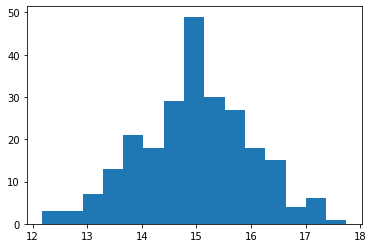

In [ ]:
plt.hist(df['Total bill'],bins=15)

## **Mean and Variance**

In [ ]:
x = np.array(df['Total bill'])
m1 = np.average(x)
ss = np.var(x,ddof=1)
print("Average", m1)
print("Variance", ss)

Average 14.980788770491804
Variance 1.0638168311120624


# **Alpha and Beta using Method of Moments**
Please use light theme in google colab to view these formulae clearly

alphaMM is given by,

$ \alpha = [\bar x ^2 (1- \bar x ^2) - s^2\bar x ]/ s^2 =\bar x [(\bar x (1-\bar x^2 )/s^2)-1]$

betaMM is given by,

$ \beta = \alpha(1-\bar x )/\bar x  $

$ \bar x $ = sample mean of the sales data and, $s^2$ = sample variance of the sales data

In [ ]:
#From method of moments
alphaMM =  ((((1-m1)/ss)-(1/m1))*m1**m1)
betaMM  = alphaMM*(1-m1)/m1
alphaMM=-1*alphaMM
print("Alpha MME : ", alphaMM)
print("Beta MME : ", betaMM)

Alpha MME :  5.386440532865434e+18
Beta MME :  5.026883995797419e+18


##Plot of MM with histogram

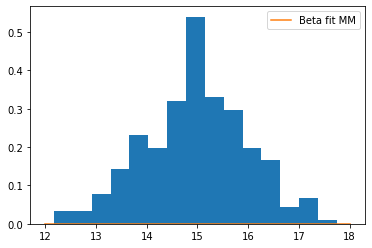

In [ ]:
#Plotting fit on density histogram
fig,ax = plt.subplots(1,1)
ax.hist(x,density=True,bins=15)
xx=np.linspace(12,18,500)
st.beta.pdf(xx,alphaMM,betaMM)
ax.plot(xx,st.beta.pdf(xx,alphaMM,betaMM,False,20),label="Beta fit MM")
ax.legend(loc='best')
plt.show()

## Bootstrap method to find alpha and beta

In [ ]:
#Use bootstrap method to find alpha and beta

N= 100 #Running the simulation 1000 times
n = 500 #As we have 5000 samples
alpha_hat = np.zeros(N)
beta_hat = np.zeros(N)
for i in np.arange(N):
    xi = st.beta.rvs(alphaMM,betaMM,size=n)
    m1i = np.average(xi); ssi = np.var(xi)
    alpha_hat[i] = m1i*((m1i*(1-m1i)/ssi)-1)
    beta_hat[i]  = alpha_hat[i]*(1-m1i)/m1i

## Histogram plot of alpha and beta obtained from bootstrap

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 50.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([-0.5 , -0.48, -0.46, -0.44, -0.42, -0.4 , -0.38, -0.36, -0.34,
        -0.32, -0.3 , -0.28, -0.26, -0.24, -0.22, -0.2 , -0.18, -0.16,
        -0.14, -0.12, -0.1 , -0.08, -0.06, -0.04, -0.02,  0.  ,  0.02,
         0.04,  0.06,  0.08,  0.1 ,  0.12,  0.14,  0.16,  0.18,  0.2 ,
         0.22,  0.24,  0.26,  0.28,  0.3 ,  0.32,  0.34,  0.36,  0.38,
         0.4 ,  0.42,  0.44,  0.46,  0.48,  0.5 ]),
 <a list of 50 Patch objects>)

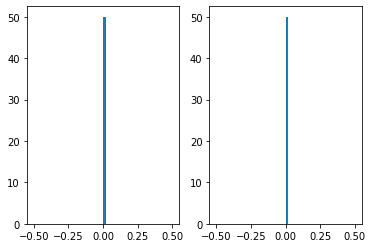

In [ ]:
#Plot histogram of the estimates(alpha,beta) from bootstrap

ax1 = plt.subplot(121)
ax1.hist(alpha_hat,density=True,bins=50)
ax2 = plt.subplot(122)
ax2.hist(beta_hat,density=True,bins=50)

The sample standard deviations of the estimates is a bootstrap estimate for the standard error of the estimator

In [ ]:
print(np.sqrt(np.var(alpha_hat)))
print(np.sqrt(np.var(beta_hat)))

3.600441866515128e+17
3.3601045971296595e+17


## 95% Confidence Intervals for alpha and beta

In [ ]:
del1_alpha = np.percentile(alpha_hat - alphaMM, 97.5)
del2_alpha = np.percentile(alpha_hat - alphaMM, 2.5)
print([del1_alpha,del2_alpha])
del1_beta = np.percentile(beta_hat - betaMM, 97.5)
del2_beta = np.percentile(beta_hat - betaMM, 2.5)
print([del1_beta,del2_beta])

[7.210026702632602e+17, -6.143822760923185e+17]
[6.728741850415105e+17, -5.7337093251175904e+17]


In [ ]:
#The 95% C.I. works out to(for alpha and beta):
print([alphaMM - del1_alpha, alphaMM - del2_alpha])
print([betaMM - del1_beta, betaMM - del2_beta])

[4.665437862602173e+18, 6.000822808957752e+18]
[4.3540098107559086e+18, 5.600254928309178e+18]


## Parameter estimation using MLE

In [ ]:
#Referred to wikipedia for formulae for estimation of alpha and beta

p = np.sign(x) * (np.abs(x))**(1/n)
pminusx = (np.abs(1-x)**(1/n))
G_x = np.prod(p)
G_1minusx = np.prod(pminusx)

alphaML = 1/2 + G_x/(2*(1 - G_x - G_1minusx))
print(alphaML)
betaML = 1/2 + G_1minusx/(2*(1 - G_x - G_1minusx))
print(betaML)


0.20579144378837344
0.21559446216076222


## Histogram plot with ML and MM fit

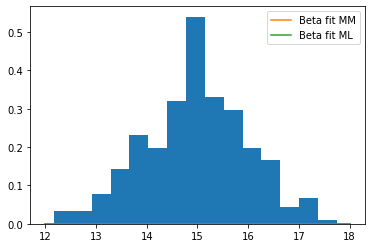

In [ ]:
#Checking the fit with the histogram

fig,ax = plt.subplots(1,1)
ax.hist(x,density=True,bins=15)
xx = np.linspace(12,18,15)
ax.plot(xx, st.beta.pdf(xx,alphaMM,betaMM),label="Beta fit MM")
ax.plot(xx, st.beta.pdf(xx,alphaML,betaML),label="Beta fit ML")
ax.legend(loc='best')
plt.show()